link dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## DATA PREPROCESSING

In [54]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df[['diabetes']] = mm.fit_transform(df[['diabetes']])

In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[['HbA1c_level', 'blood_glucose_level']] = ss.fit_transform(df[['HbA1c_level', 'blood_glucose_level']])

## DATA CLEANING

In [56]:
df.duplicated().sum()

3854

In [57]:
df.drop_duplicates(inplace=True)

# **A. SUPERVISED LEARNING**

## **A1**

### SUPPORT VECTOR MACHINE

menggunakan support vector machine karena menggunakan label kategorikal

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# mengambil 2 fitur untuk Binary Classification
X_svm = df[['HbA1c_level', 'blood_glucose_level']]
y_svm = df['diabetes']

# membagi dataset menjadi train set dan test set
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.3, random_state=42
)

In [59]:
svm = SVC(kernel='linear') # membuat objek classifier (model) SVM
svm.fit(X_train_svm, y_train_svm) # melatih classifier dengan data train

SVC(kernel='linear')

In [60]:
# melakukan prediksi data test dengan model
y_pred_svm = svm.predict(X_test_svm)

# menyimpan nilai Support Vectors dan indexnya
sv = svm.support_vectors_
sv_indices = np.where(np.isin(X_train_svm, sv).all(axis=1))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


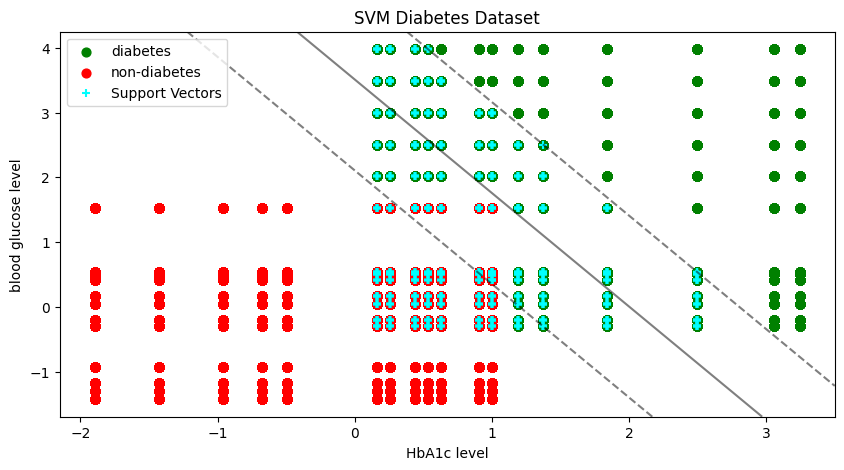

In [61]:
plt.figure(figsize=(10,5))

# plot data points dari diabetes
plt.scatter(X_svm[y_svm==1].iloc[:, 0], # kolom X1 (sepal length)
            X_svm[y_svm==1].iloc[:, 1], # kolom X2 (sepal width)
            s=40, c='green', marker='o', label='diabetes')

# plot data points dari non-diabetes
plt.scatter(X_svm[y_svm==0].iloc[:, 0], # kolom X1 (sepal length)
            X_svm[y_svm==0].iloc[:, 1], # kolom X2 (sepal width)
            s=40, c='red', marker='o', label='non-diabetes')

# plot data points dari support vectors
# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(sv[:, 0], sv[:, 1], s=40,
            color='cyan', marker='+', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
                     np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x
# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel("HbA1c level")
plt.ylabel("blood glucose level")
plt.legend()
plt.title("SVM Diabetes Dataset")
plt.show()

## **A2**

### KLASIFIKASI: CONFUSION MATRIX

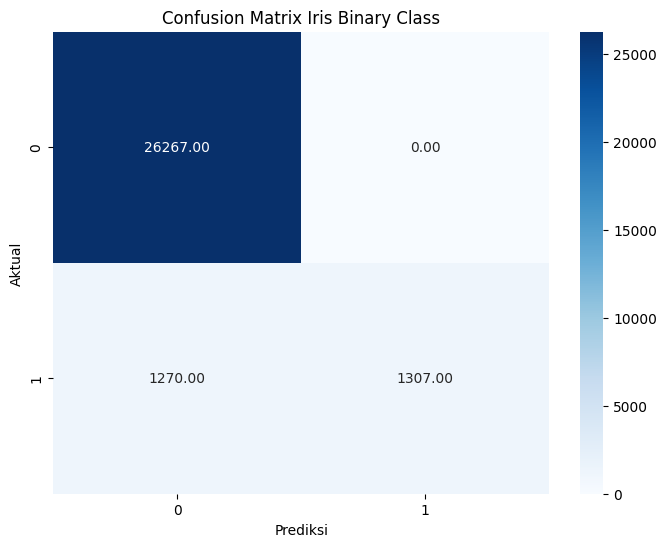

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm, y_pred_svm)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.2f')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Iris Binary Class')
plt.show()

### KLASIFIKASI: CLASSIFICATION REPORT

In [63]:
from sklearn.metrics import classification_report

report = classification_report(y_test_svm, y_pred_svm)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     26267
         1.0       1.00      0.51      0.67      2577

    accuracy                           0.96     28844
   macro avg       0.98      0.75      0.82     28844
weighted avg       0.96      0.96      0.95     28844



## **A3**

In [64]:
from sklearn.inspection import DecisionBoundaryDisplay

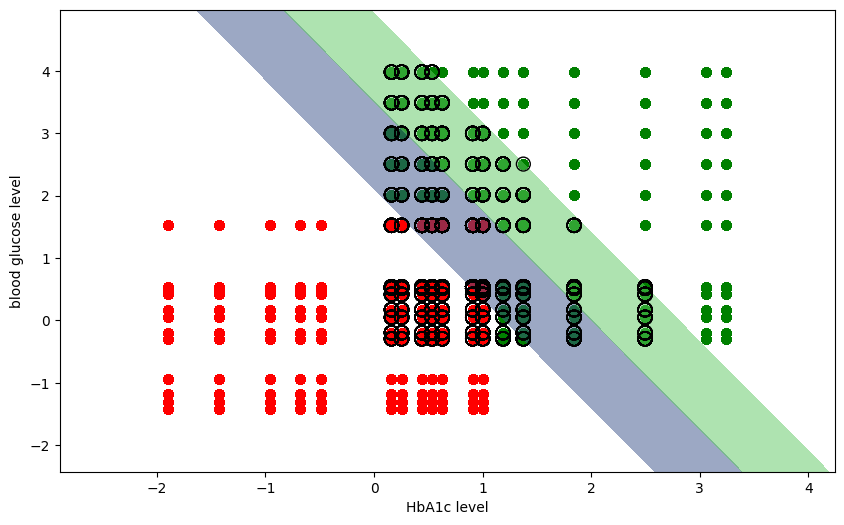

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X_svm[y_svm == 1].iloc[:, 0], X_svm[y_svm == 1].iloc[:, 1], s=40,
            label='diabetes', marker='o', color='green')
plt.scatter(X_svm[y_svm == 0].iloc[:, 0], X_svm[y_svm == 0].iloc[:, 1], s=40,
            label='non-diabetes', marker='o', color='red')

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X_svm,
    plot_method="contourf",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('HbA1c level')
plt.ylabel('blood glucose level')
plt.show()

# **B. UNSUPERVISED LEARNING**

## **B1. Implementasi K-Means**

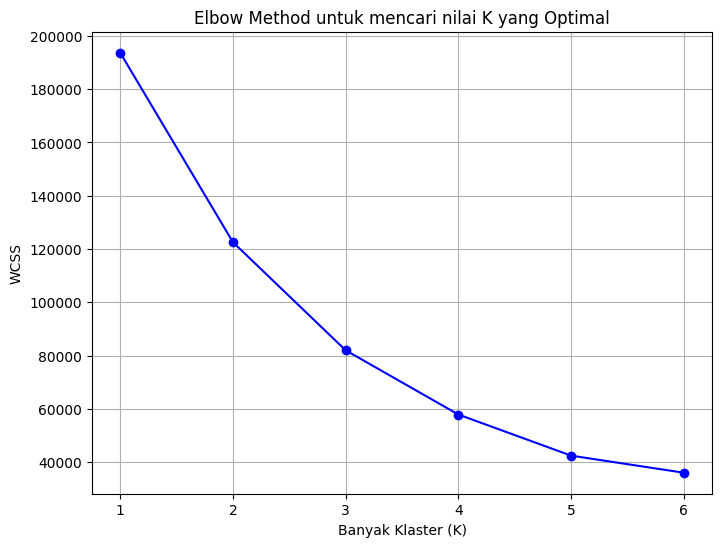

In [66]:
from sklearn.cluster import KMeans
X_km = df.iloc[:, 6:8].values # Ambil data-data fiturnya untuk variabel X
wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X_km)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

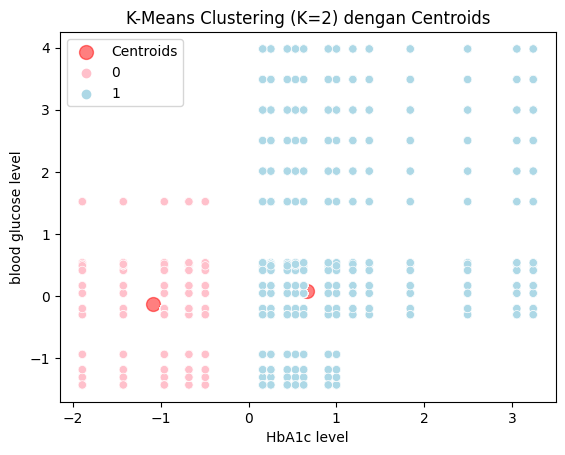

In [67]:
K = 2 # Pilih angka banyaknya kelompok (K)
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X_km) # Latih model K-Means berdasarkan data X
cluster_labels = kmeans.labels_ # Label kelompok dari model
df["cluster"] = cluster_labels # Tambahkan kolom prediksi
centroids = kmeans.cluster_centers_ # Titik pusat kelompok dari model
# Visualisasikan kelompok (kluster) data Iris
warna = ["pink", "lightblue"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,
            label='Centroids')
sns.scatterplot(data=df, x="HbA1c_level", y="blood_glucose_level",
                hue="cluster", palette=warna)
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("HbA1c level")
plt.ylabel("blood glucose level")
plt.legend()
plt.show()

## **B2**

In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X_km, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X_km, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X_km, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.40
Davies-Bouldin Index: 1.04
Calinski-Harabasz Index: 55809.83


In [69]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["diabetes"])
print("Cross-Tabulation:")
print(cross_tab, "\n")
# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["diabetes"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘diabetes’ menjadi numerik
# true_labels_num = df["diabetes"].astype("category").cat.codes
nmi = normalized_mutual_info_score(df['diabetes'], cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df["diabetes"], cluster_labels)
completeness = completeness_score(df["diabetes"], cluster_labels)
v_measure = v_measure_score(df["diabetes"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
diabetes    0.0   1.0
cluster              
0         36265     0
1         51399  8482 

Adjusted Rand Index (ARI): -0.04
Normalized Mutual Information (NMI): 0.09
Homogeneity Score: 0.15
Completeness Score: 0.07
V-Measure Score: 0.09


## **B3**

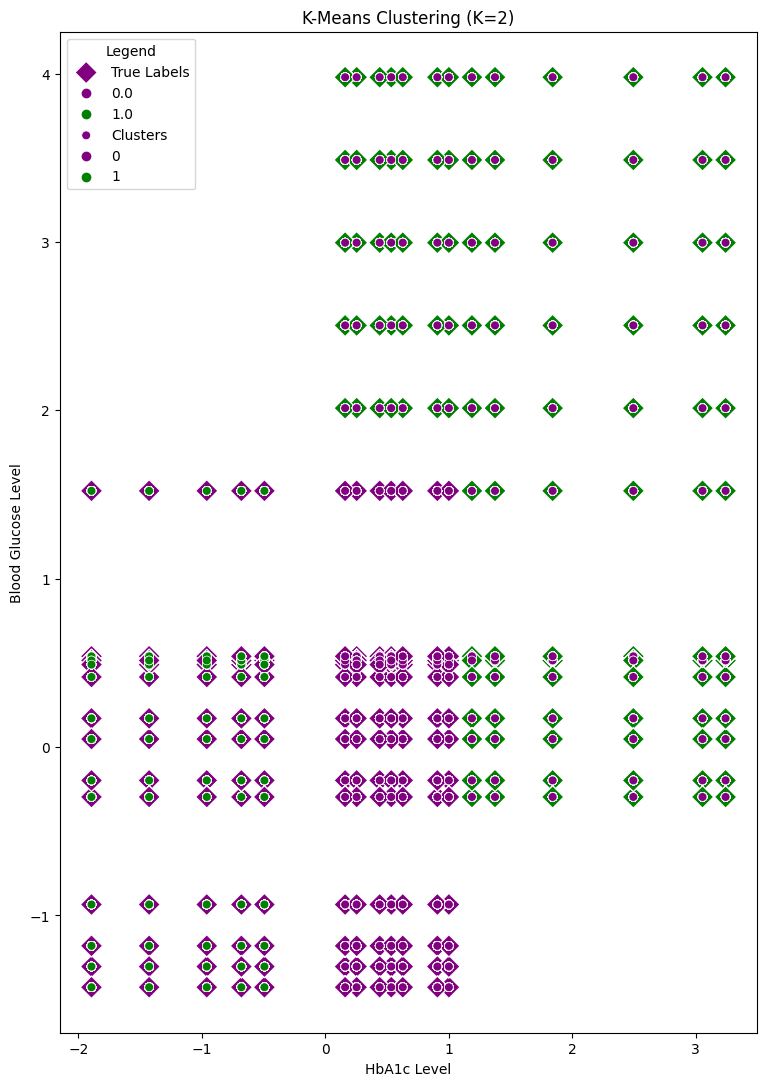

In [70]:
# Karena hasil prediksi memiliki urutan berbeda dengan label aslinya
# Maka harus dilakukan mapping seperti berikut
cluster_mapping = {0: 1, 1: 0} # 0 jadi 1; 1 jadi 0; 2 tetap 2
# Buat kolom baru agar tidak mengganggu kolom hasil prediksi
df["cluster2"] = df["cluster"].map(cluster_mapping)
# Buat sebuah scatter plot untuk data-points label aslinya
plt.figure(figsize=(9,13))
warna = ["purple", "green"]
sns.scatterplot(df, x="HbA1c_level", y="blood_glucose_level", palette=warna,
hue="diabetes", marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(df, x="HbA1c_level", y="blood_glucose_level", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel("HbA1c Level")
plt.ylabel("Blood Glucose Level")
plt.legend(title="Legend")
plt.show()